# Обработка данных

Была выполнена обработка собранной информации: форматирование данных, заполнение пустых значенийб добавление новых параметров

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts
from scipy.stats import ttest_ind

plt.style.use('ggplot')

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/database2.csv', delimiter='\t')
df

Mounted at /content/drive


,Year,Month,Day,Event,Site,Round,White,Black,WhiteElo,BlackElo,Opening,ECO,Moves number,Result
0,1971.0,??,??,IBM,Amsterdam,6,"Scholl, Eduard C","Timman, Jan H",2430,2445,PetroffOther3,C49,43,0-1
1,1971.0,??,??,URS-ch39,Leningrad,?,"Geller, Efim P","Smyslov, Vassily",2615,2620,PetroffOther3,C43,11,1/2-1/2
2,1971.0,??,??,URS-ch39,Leningrad,?,"Shamkovich, Leonid","Smyslov, Vassily",2520,2620,PetroffOther3,C65,14,1/2-1/2
3,1971.0,??,??,CSR-ch,Luhacovice,4,"Jansa, Vlastimil","Kolarov, Atanas S",2450,2435,PetroffOther3,C43,31,1-0
4,1971.0,??,??,Malaga,Malaga,?,"Ciocaltea, Victor","Rogoff, Kenneth",2460,2410,PetroffOther3,C43,43,1-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900167,2023.0,12,30,World Blitz 2023,Samarkand UZB,16.101,"Bogdan,David","Amangeldy,Ernur",1671,2134,Sicilian2d6-4Qxd4,B53,99,0-1
2900168,2023.0,12,30,World Blitz 2023,Samarkand UZB,17.47,"Hovhannisyan,R","Gokerkan,Cem Kaan",2611,2523,Sicilian2d6-4Qxd4,B53,32,1-0
2900169,2023.0,12,30,World Blitz 2023,Samarkand UZB,17.101,"Bogdan,David","Kuandykuly,Danis",1671,2095,Sicilian2d6-4Qxd4,B53,47,0-1
2900170,2023.0,12,30,World Blitz 2023,Samarkand UZB,19.26,"Shimanov,A","Bocharov,D",2578,2518,Sicilian2d6-4Qxd4,B53,33,1-0


**Шаг 1**

Преобразуем пустые значения в более привычный нам вид NaN

In [3]:
df = df.dropna(how='all').replace('', np.nan).replace('?', np.nan).replace('??', np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900172 entries, 0 to 2900171
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Year          float64
 1   Month         object 
 2   Day           object 
 3   Event         object 
 4   Site          object 
 5   Round         object 
 6   White         object 
 7   Black         object 
 8   WhiteElo      int64  
 9   BlackElo      int64  
 10  Opening       object 
 11  ECO           object 
 12  Moves number  int64  
 13  Result        object 
dtypes: float64(1), int64(3), object(10)
memory usage: 309.8+ MB


In [5]:
df.isna().sum()

Year                 1
Month           481583
Day             482396
Event                3
Site             20298
Round           177506
White                7
Black                6
WhiteElo             0
BlackElo             0
Opening              0
ECO                  0
Moves number         0
Result               1
dtype: int64

**Проанализировав инормацию, имеем следущее:**

1. у нас слишком много категориальных переменных и многие скорее всего нам даже не понадобятся, поэтому скорее всего стоит их удалить или преобразовать.


2. Есть пропущенные значения, и это нужно исправлять

**Шаг 2**

Избавляемся от пустых значений

> К сожалению так как по большей части значения категориальные и каждая строка по факту является уникальной (не учитывая индекс), то восстановить значения, используя информацию из других строк не является возможным. Поэтому единственный вариант это просто избавляться от таких пустот.

В принципе дни и месяцы, а также раунды (так как есть несколько форматов, что будет путать машинное обучение) нас мало интересуют, поэтому эти столбцы можно просто удалить

In [6]:
columns_to_drop = ['Month', 'Day', 'Round']

df.drop(columns_to_drop, axis=1, inplace=True)
df

,Year,Event,Site,White,Black,WhiteElo,BlackElo,Opening,ECO,Moves number,Result
0,1971.0,IBM,Amsterdam,"Scholl, Eduard C","Timman, Jan H",2430,2445,PetroffOther3,C49,43,0-1
1,1971.0,URS-ch39,Leningrad,"Geller, Efim P","Smyslov, Vassily",2615,2620,PetroffOther3,C43,11,1/2-1/2
2,1971.0,URS-ch39,Leningrad,"Shamkovich, Leonid","Smyslov, Vassily",2520,2620,PetroffOther3,C65,14,1/2-1/2
3,1971.0,CSR-ch,Luhacovice,"Jansa, Vlastimil","Kolarov, Atanas S",2450,2435,PetroffOther3,C43,31,1-0
4,1971.0,Malaga,Malaga,"Ciocaltea, Victor","Rogoff, Kenneth",2460,2410,PetroffOther3,C43,43,1-0
...,...,...,...,...,...,...,...,...,...,...,...
2900167,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Amangeldy,Ernur",1671,2134,Sicilian2d6-4Qxd4,B53,99,0-1
2900168,2023.0,World Blitz 2023,Samarkand UZB,"Hovhannisyan,R","Gokerkan,Cem Kaan",2611,2523,Sicilian2d6-4Qxd4,B53,32,1-0
2900169,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Kuandykuly,Danis",1671,2095,Sicilian2d6-4Qxd4,B53,47,0-1
2900170,2023.0,World Blitz 2023,Samarkand UZB,"Shimanov,A","Bocharov,D",2578,2518,Sicilian2d6-4Qxd4,B53,33,1-0


In [7]:
df.isna().sum()

Year                1
Event               3
Site            20298
White               7
Black               6
WhiteElo            0
BlackElo            0
Opening             0
ECO                 0
Moves number        0
Result              1
dtype: int64

Так как у нас самих строк около 3 миллионов, поэтому будет не критично пожертвовать 20 тысячями, так как хотелось бы сохранить место проведения

In [8]:
df = df.dropna(axis=0, subset=['Site'], how="any")
df.isna().sum()

Year            0
Event           2
Site            0
White           6
Black           5
WhiteElo        0
BlackElo        0
Opening         0
ECO             0
Moves number    0
Result          0
dtype: int64

Отлично, осталось совсем чуть-чуть до нормального вида нашей таблицы и полного избавления от пустых значений (как мы видим, так же ушли некоторые партии с другими пропущенными значениями).

Так как осталось немного значений, то их спокойно можно отдельно дропнуть

In [9]:
df = df.dropna(axis=0, how="any")
df.isna().sum()

Year            0
Event           0
Site            0
White           0
Black           0
WhiteElo        0
BlackElo        0
Opening         0
ECO             0
Moves number    0
Result          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879861 entries, 0 to 2900171
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Year          float64
 1   Event         object 
 2   Site          object 
 3   White         object 
 4   Black         object 
 5   WhiteElo      int64  
 6   BlackElo      int64  
 7   Opening       object 
 8   ECO           object 
 9   Moves number  int64  
 10  Result        object 
dtypes: float64(1), int64(3), object(7)
memory usage: 263.7+ MB


**Шаг 3**

Проверка дубликатов

> Так же стоит на всякий случай проверить строки на дубликаты, мало ли затесалось что-то индентичное (хотя по логике вещей такого не должно быть

In [11]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879538 entries, 0 to 2900171
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Year          float64
 1   Event         object 
 2   Site          object 
 3   White         object 
 4   Black         object 
 5   WhiteElo      int64  
 6   BlackElo      int64  
 7   Opening       object 
 8   ECO           object 
 9   Moves number  int64  
 10  Result        object 
dtypes: float64(1), int64(3), object(7)
memory usage: 263.6+ MB


Как оказалось несколько дубликатов все таки смогло попасть к нам в датасет, хорошо что это было вовремя замеченно и исправленно.

> Всего мы потеряли около 20 тысяч строк, при общем количестве около 3 миллионов, что совсем не критично.

# Добавление и обработка новых данных

Теперь пора добавить новые данные, которые помогут нам лучше проанализировать их, а так же построить качественные гипотезы

> Что хотелось бы преобразовать и добавить:

- 1. Года по десятилетиям (так как могли существенно менятся распределения побед и поражений как в целом, так и в отдельных дебютах)

- 2. Игрался ли турнир онлайн или офлайн (примерно та же самая причина, так как есть существенные факторы влияющие на поведение шахматистов)

- 3. Перевес в рейтинге в большую сторону к белым или черным (стандартным перевесом можно считать разницу до 100 Эло, больше, уже может говорить о существенной разнице в навыках игроков). Можно просо взять разницу в рейтинге (белые - черные).

- 4. Играют люди довольно новые в шахматах или уже гроссмейстеры (партии новичков довольно сложно предсказывать, так как это просто безумие, и ходы могут быть как блестящими, так и зевком мата в 1 ход. У гроссмейстеров все противоположно, так как они играют как компьютеры и редко допускают ошибки).

- 5. В конце концов это дамми переменные по всем интерсующим нас категориальным переменным. В начале надо будет добавить все, но потом надо будет оптимизировать модель, на что-то конкретное. (например результаты можно предложить как 1-0 = 1, 1/2-1/2 = 0, 0-1 = -1).

- 6. Необходимо добавить квадрат от количества ходов, потому что скорее всего есть определенное количество ходов, после которых, преимущество белых нивелируется, и скорее всего партия перейдет в ничью или в победу черных



**Шаг 1**

Добавление десятилетий (скорее всего в машинном обучение именно они и будут использованны, а не предыдущие значения лет)

In [12]:
df['Year_10s']=df['Year']//10*10

**Шаг 2**

Онлайн или офлайн турнир

> После небольшого анализа значений в колонке *Cite* и *Event* выясняется, что турниры проводимы онлайн имеют отличительные особенности, а именно:
- Наличие ".com" или "internet" само за себя уже говорит
- Так же ICC (Internet chess club) так же свидетельствует об онлайн игре
- Код страны в конце = INT (internet)


In [13]:
unique_array = df.drop_duplicates(subset=["Site"])
unique_array

,Year,Event,Site,White,Black,WhiteElo,BlackElo,Opening,ECO,Moves number,Result,Year_10s
0,1971.0,IBM,Amsterdam,"Scholl, Eduard C","Timman, Jan H",2430,2445,PetroffOther3,C49,43,0-1,1970.0
1,1971.0,URS-ch39,Leningrad,"Geller, Efim P","Smyslov, Vassily",2615,2620,PetroffOther3,C43,11,1/2-1/2,1970.0
3,1971.0,CSR-ch,Luhacovice,"Jansa, Vlastimil","Kolarov, Atanas S",2450,2435,PetroffOther3,C43,31,1-0,1970.0
4,1971.0,Malaga,Malaga,"Ciocaltea, Victor","Rogoff, Kenneth",2460,2410,PetroffOther3,C43,43,1-0,1970.0
5,1971.0,Rubinstein mem,Polanica Zdroj,"Nicevski, Risto","Bednarski, Jacek B",2410,2400,PetroffOther3,C43,39,1-0,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2803074,2014.0,Estepona Quadrangular 2014,Estepona ESP,"Illescas Cordoba,M","Matamoros Franco,C",2607,2581,FrenchAdvance,C02,43,1/2-1/2,2010.0
2819538,1997.0,GP Kiryat Shmuel,Kiryat Shmuel,"Tsesarsky, Ilya","Tseitlin, Mark D",2445,2530,EnglishSymOtherB3,A34,19,0-1,1990.0
2843795,2001.0,Champions Club Blitz,Kasparovchess.com INT,"Kasparov,G","Kramnik,V",2827,2797,QID4Nc3,E12,47,0-1,2000.0
2851281,1999.0,Dyfed op,Dyfed,"Smith, Andrew Philip","Plaskett, Jim",2274,2483,SicilianNajdorf6Bg5,B95,44,1-0,1990.0


In [14]:
def online_or_not(data):
  if "ICC" in data \
  or ".com" in data \
  or "internet" in data.lower() \
  or data[:-3] == "INT":
    return 1
  else:
    return 0

# Сделаны два отдельных, так как не знаем как это обьеденить в одной функции
df["event_online"] = df["Event"].apply(online_or_not)
df["site_online"] = df["Site"].apply(online_or_not)

df["Online"] = (df["event_online"] | df["site_online"])
df #проверяем, что все нормуль считается

,Year,Event,Site,White,Black,WhiteElo,BlackElo,Opening,ECO,Moves number,Result,Year_10s,event_online,site_online,Online
0,1971.0,IBM,Amsterdam,"Scholl, Eduard C","Timman, Jan H",2430,2445,PetroffOther3,C49,43,0-1,1970.0,0,0,0
1,1971.0,URS-ch39,Leningrad,"Geller, Efim P","Smyslov, Vassily",2615,2620,PetroffOther3,C43,11,1/2-1/2,1970.0,0,0,0
2,1971.0,URS-ch39,Leningrad,"Shamkovich, Leonid","Smyslov, Vassily",2520,2620,PetroffOther3,C65,14,1/2-1/2,1970.0,0,0,0
3,1971.0,CSR-ch,Luhacovice,"Jansa, Vlastimil","Kolarov, Atanas S",2450,2435,PetroffOther3,C43,31,1-0,1970.0,0,0,0
4,1971.0,Malaga,Malaga,"Ciocaltea, Victor","Rogoff, Kenneth",2460,2410,PetroffOther3,C43,43,1-0,1970.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900167,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Amangeldy,Ernur",1671,2134,Sicilian2d6-4Qxd4,B53,99,0-1,2020.0,0,0,0
2900168,2023.0,World Blitz 2023,Samarkand UZB,"Hovhannisyan,R","Gokerkan,Cem Kaan",2611,2523,Sicilian2d6-4Qxd4,B53,32,1-0,2020.0,0,0,0
2900169,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Kuandykuly,Danis",1671,2095,Sicilian2d6-4Qxd4,B53,47,0-1,2020.0,0,0,0
2900170,2023.0,World Blitz 2023,Samarkand UZB,"Shimanov,A","Bocharov,D",2578,2518,Sicilian2d6-4Qxd4,B53,33,1-0,2020.0,0,0,0


In [15]:
df = df.drop(columns=["event_online", 'site_online'])
df["Online"].value_counts()

Online
0    2436234
1     443304
Name: count, dtype: int64

>Как мы видим, у нас не такое уж и большое количество партий получилось онлайн, однако это лучше чем ничего. Скорее всего это связано с не очень качественной разметкой, а так же путаницей, так как очень тяжело опредилить онлайн партии, по другим, не вышеперечисленным признакам.

В какой-то мере полученные цифры логичны, так как большинство матчей с 1970 года будут сыграны в офлайне. Возможно сыграла специфика сайта, и по большей части в нем данные, по довольно крупным турнирам, которые преимущественно проводятся оффлайн

**Шаг 3**

Перевес в рейтинге. Считаем как и обычное абсолютное значение, так и наличие существенного перевеса, который может сыграть свою роль


In [16]:
def BIG_DIfference(value):
  if value >= 100:
    return 'white'
  elif value <= -100:
    return 'black'
  else:
    return 'equal'


df["Rating_diff"]=df['WhiteElo']-df['BlackElo']
df["Big_difference_to"]=df["Rating_diff"].apply(BIG_DIfference)

**Шаг 4**

Игра профессионалов или же начинающих
> Разбиение по форме:
- elo < 1500 - новичок (довольно интересный порог, которым многим так и не удается пройти)
- 1500 < elo < 2300 (любители)
- 2300 < elo (гроссмейстеры/профессионалы)


In [17]:
def who_am_i(elo):
  if elo < 1500:
    return 'starter'
  elif elo > 2300:
    return 'profeccional'
  else:
    return 'amature'


df['White_rank'] = df['WhiteElo'].apply(who_am_i)
df['Black_rank'] = df['BlackElo'].apply(who_am_i)

**Шаг 5**

Замена на другие переменные.

>так как мы будем использовать разные модели, то нужно так же и разный тип переменных. Для линейной регрессии нужен результат в виде реального значения, поэтому результат представляем в виде 1/0/-1

Остальные преобразованния на дамми переменные мы сделаем перед самим уже обучением, с помощью различних библиотек, по типу OHE




In [18]:
df['Result'].value_counts()

Result
1-0         1132008
0-1          896022
1/2-1/2      851293
*               212
1/2-1/2`          2
1/2 1/2           1
Name: count, dtype: int64

In [19]:
df = df[(df['Result'] != '*') & (df['Result'] != '1/2-1/2`') & (df['Result'] != '1/2 1/2')]
df = df[(df['Year_10s'] != 1790) & (df['Year_10s'] != 30) & (df['Year_10s'] != 1950)\
        & (df['Year_10s'] != 1960) & (df['Year_10s'] != 1900)]
df['Year_10s'].value_counts()

Year_10s
2010.0    1019513
2020.0     803001
2000.0     526015
1990.0     394546
1980.0      99970
1970.0      36272
Name: count, dtype: int64

In [20]:
def get_result(value):
  if value == "1-0":
    return 1
  elif value == "0-1":
    return -1
  else:
    return 0

df['Result_cont'] = df['Result'].apply(get_result)
df

,Year,Event,Site,White,Black,WhiteElo,BlackElo,Opening,ECO,Moves number,Result,Year_10s,Online,Rating_diff,Big_difference_to,White_rank,Black_rank,Result_cont
0,1971.0,IBM,Amsterdam,"Scholl, Eduard C","Timman, Jan H",2430,2445,PetroffOther3,C49,43,0-1,1970.0,0,-15,equal,profeccional,profeccional,-1
1,1971.0,URS-ch39,Leningrad,"Geller, Efim P","Smyslov, Vassily",2615,2620,PetroffOther3,C43,11,1/2-1/2,1970.0,0,-5,equal,profeccional,profeccional,0
2,1971.0,URS-ch39,Leningrad,"Shamkovich, Leonid","Smyslov, Vassily",2520,2620,PetroffOther3,C65,14,1/2-1/2,1970.0,0,-100,black,profeccional,profeccional,0
3,1971.0,CSR-ch,Luhacovice,"Jansa, Vlastimil","Kolarov, Atanas S",2450,2435,PetroffOther3,C43,31,1-0,1970.0,0,15,equal,profeccional,profeccional,1
4,1971.0,Malaga,Malaga,"Ciocaltea, Victor","Rogoff, Kenneth",2460,2410,PetroffOther3,C43,43,1-0,1970.0,0,50,equal,profeccional,profeccional,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900167,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Amangeldy,Ernur",1671,2134,Sicilian2d6-4Qxd4,B53,99,0-1,2020.0,0,-463,black,amature,amature,-1
2900168,2023.0,World Blitz 2023,Samarkand UZB,"Hovhannisyan,R","Gokerkan,Cem Kaan",2611,2523,Sicilian2d6-4Qxd4,B53,32,1-0,2020.0,0,88,equal,profeccional,profeccional,1
2900169,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Kuandykuly,Danis",1671,2095,Sicilian2d6-4Qxd4,B53,47,0-1,2020.0,0,-424,black,amature,amature,-1
2900170,2023.0,World Blitz 2023,Samarkand UZB,"Shimanov,A","Bocharov,D",2578,2518,Sicilian2d6-4Qxd4,B53,33,1-0,2020.0,0,60,equal,profeccional,profeccional,1


**Шаг 6**

Добавление квадратов шагов

In [21]:
df['Moves_sq'] = df['Moves number']**2
df

,Year,Event,Site,White,Black,WhiteElo,BlackElo,Opening,ECO,Moves number,Result,Year_10s,Online,Rating_diff,Big_difference_to,White_rank,Black_rank,Result_cont,Moves_sq
0,1971.0,IBM,Amsterdam,"Scholl, Eduard C","Timman, Jan H",2430,2445,PetroffOther3,C49,43,0-1,1970.0,0,-15,equal,profeccional,profeccional,-1,1849
1,1971.0,URS-ch39,Leningrad,"Geller, Efim P","Smyslov, Vassily",2615,2620,PetroffOther3,C43,11,1/2-1/2,1970.0,0,-5,equal,profeccional,profeccional,0,121
2,1971.0,URS-ch39,Leningrad,"Shamkovich, Leonid","Smyslov, Vassily",2520,2620,PetroffOther3,C65,14,1/2-1/2,1970.0,0,-100,black,profeccional,profeccional,0,196
3,1971.0,CSR-ch,Luhacovice,"Jansa, Vlastimil","Kolarov, Atanas S",2450,2435,PetroffOther3,C43,31,1-0,1970.0,0,15,equal,profeccional,profeccional,1,961
4,1971.0,Malaga,Malaga,"Ciocaltea, Victor","Rogoff, Kenneth",2460,2410,PetroffOther3,C43,43,1-0,1970.0,0,50,equal,profeccional,profeccional,1,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900167,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Amangeldy,Ernur",1671,2134,Sicilian2d6-4Qxd4,B53,99,0-1,2020.0,0,-463,black,amature,amature,-1,9801
2900168,2023.0,World Blitz 2023,Samarkand UZB,"Hovhannisyan,R","Gokerkan,Cem Kaan",2611,2523,Sicilian2d6-4Qxd4,B53,32,1-0,2020.0,0,88,equal,profeccional,profeccional,1,1024
2900169,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Kuandykuly,Danis",1671,2095,Sicilian2d6-4Qxd4,B53,47,0-1,2020.0,0,-424,black,amature,amature,-1,2209
2900170,2023.0,World Blitz 2023,Samarkand UZB,"Shimanov,A","Bocharov,D",2578,2518,Sicilian2d6-4Qxd4,B53,33,1-0,2020.0,0,60,equal,profeccional,profeccional,1,1089


# EDA

In [22]:
df.describe()

,Year,WhiteElo,BlackElo,Moves number,Year_10s,Online,Rating_diff,Result_cont,Moves_sq
count,2.879317e+06,2.879317e+06,2.879317e+06,2.879317e+06,2.879317e+06,2.879317e+06,2.879317e+06,2.879317e+06,2.879317e+06
mean,2.010820e+03,2.287977e+03,2.284466e+03,4.117037e+01,2.006676e+03,1.539591e-01,3.511639e+00,8.195867e-02,1.985426e+03
std,1.105766e+01,2.566975e+02,2.835432e+02,1.704189e+01,1.188793e+01,3.609096e-01,2.518412e+02,8.352397e-01,1.765462e+03
min,1.971000e+03,1.000000e+02,1.000000e+02,0.000000e+00,1.970000e+03,0.000000e+00,-2.019420e+05,-1.000000e+00,0.000000e+00
25%,2.004000e+03,2.155000e+03,2.151000e+03,3.000000e+01,2.000000e+03,0.000000e+00,-1.350000e+02,-1.000000e+00,9.000000e+02
50%,2.014000e+03,2.322000e+03,2.319000e+03,3.900000e+01,2.010000e+03,0.000000e+00,4.000000e+00,0.000000e+00,1.521000e+03
75%,2.020000e+03,2.464000e+03,2.460000e+03,5.100000e+01,2.020000e+03,0.000000e+00,1.420000e+02,1.000000e+00,2.601000e+03
max,2.024000e+03,3.958000e+03,2.042690e+05,2.000000e+02,2.020000e+03,1.000000e+00,2.380000e+03,1.000000e+00,4.000000e+04


Как мы видим, у нас закралась какая-то ошибка в виде эло черных = 204269. Эти данные выкидываем, остыльные данные вроде как в порядке

In [23]:
df = df[df['BlackElo'] != 204269]
df.describe()

,Year,WhiteElo,BlackElo,Moves number,Year_10s,Online,Rating_diff,Result_cont,Moves_sq
count,2.879316e+06,2.879316e+06,2.879316e+06,2.879316e+06,2.879316e+06,2.879316e+06,2.879316e+06,2.879316e+06,2.879316e+06
mean,2.010820e+03,2.287977e+03,2.284395e+03,4.117037e+01,2.006676e+03,1.539591e-01,3.581776e+00,8.195870e-02,1.985426e+03
std,1.105766e+01,2.566976e+02,2.573471e+02,1.704189e+01,1.188793e+01,3.609096e-01,2.219464e+02,8.352399e-01,1.765462e+03
min,1.971000e+03,1.000000e+02,1.000000e+02,0.000000e+00,1.970000e+03,0.000000e+00,-2.322000e+03,-1.000000e+00,0.000000e+00
25%,2.004000e+03,2.155000e+03,2.151000e+03,3.000000e+01,2.000000e+03,0.000000e+00,-1.350000e+02,-1.000000e+00,9.000000e+02
50%,2.014000e+03,2.322000e+03,2.319000e+03,3.900000e+01,2.010000e+03,0.000000e+00,4.000000e+00,0.000000e+00,1.521000e+03
75%,2.020000e+03,2.464000e+03,2.460000e+03,5.100000e+01,2.020000e+03,0.000000e+00,1.420000e+02,1.000000e+00,2.601000e+03
max,2.024000e+03,3.958000e+03,3.958000e+03,2.000000e+02,2.020000e+03,1.000000e+00,2.380000e+03,1.000000e+00,4.000000e+04


**Шаг 1**

Посмотрим на корреляцию значений

<Axes: >

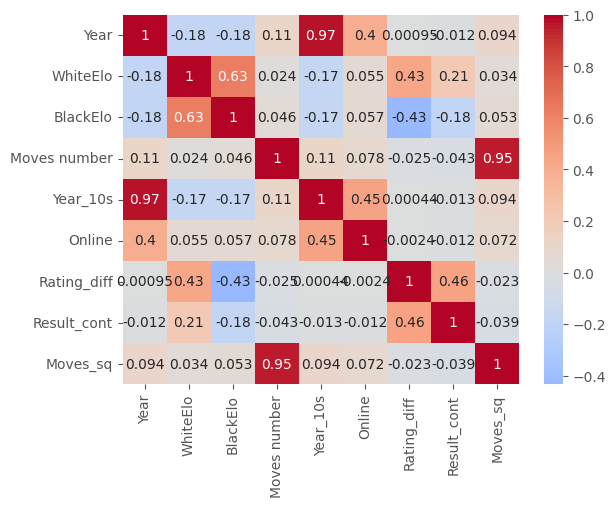

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)

Как мы видим, больших корреляций между переменными нет, кроме самых очевидных, которые и должны быть. Это говорит, о скрее всего невозможности построить линейную модель, однако так же мы избегаем огромных проблем с мультиколлиарностью

**Шаг 2**

Распределения значений

1. *разница рейтингов*

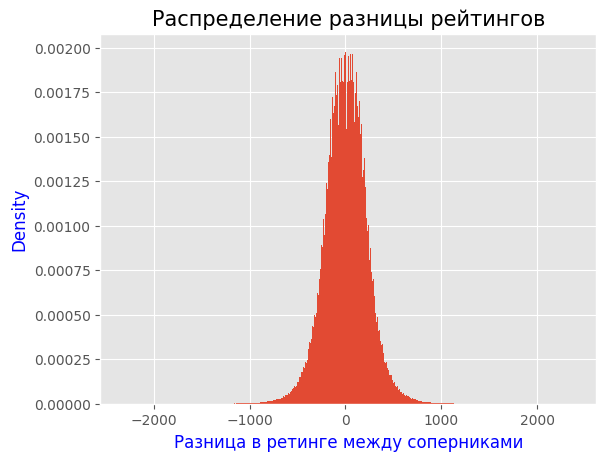

In [25]:
plt.hist(df['Rating_diff'], bins=500, density=True)
plt.xlabel("Разница в ретинге между соперниками", fontsize=12, color="blue")
plt.ylabel("Density", fontsize=12, color="blue")
plt.title("Распределение разницы рейтингов", fontsize=15)
plt.show()

> **Вывод:** Как мы видим, распределение очень похоже на нормальное, без сильных перевесов в какую-либо из сторон. Это очень хороший сигнал, и никаких доп действий (нормировка и тд) с данными не надо будет делать.

2. *распределение рейтингов*

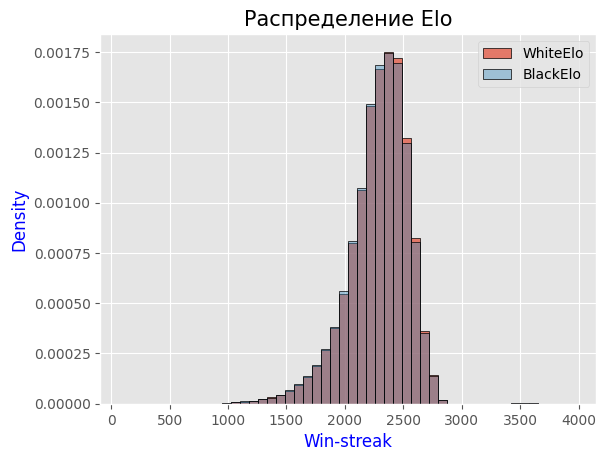

In [26]:
sns.histplot(df['WhiteElo'], bins=50, alpha=0.7, label='WhiteElo', edgecolor='k', stat="density")
sns.histplot(df['BlackElo'], bins=50, alpha=0.4, label='BlackElo', edgecolor='k',  stat="density")
plt.ylabel("Density", color="blue", fontsize=12)
plt.xlabel("Win-streak", color="blue", fontsize=12)
plt.title("Распределение Elo", fontsize=15)
plt.legend()
plt.show()

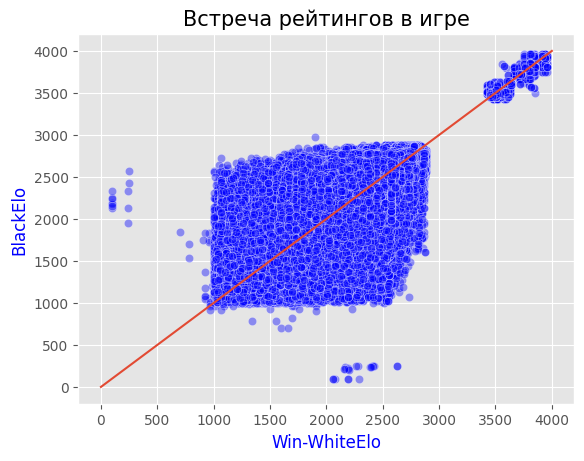

In [27]:
sns.scatterplot(x='WhiteElo', y='BlackElo', alpha=0.4, color='b', data=df)
plt.ylabel("BlackElo", color="blue", fontsize=12)
plt.xlabel("Win-WhiteElo", color="blue", fontsize=12)
plt.title("Встреча рейтингов в игре", fontsize=15)
plt.plot([0,4000], [0,4000])
plt.show()

> **Вывод:** Как видно из графиков, распределение рейтинга за белых и черных одинаковые. Также заметно, что различия в рейтинге в играх иногда сильно отличаются от идеальной линии (когда рейтинги равны), что говорит об не идеальном подборе игроков.

Стоит посмотреть на результат партии от рейтинга соперников



3. *Результат от рейтинга соперников*

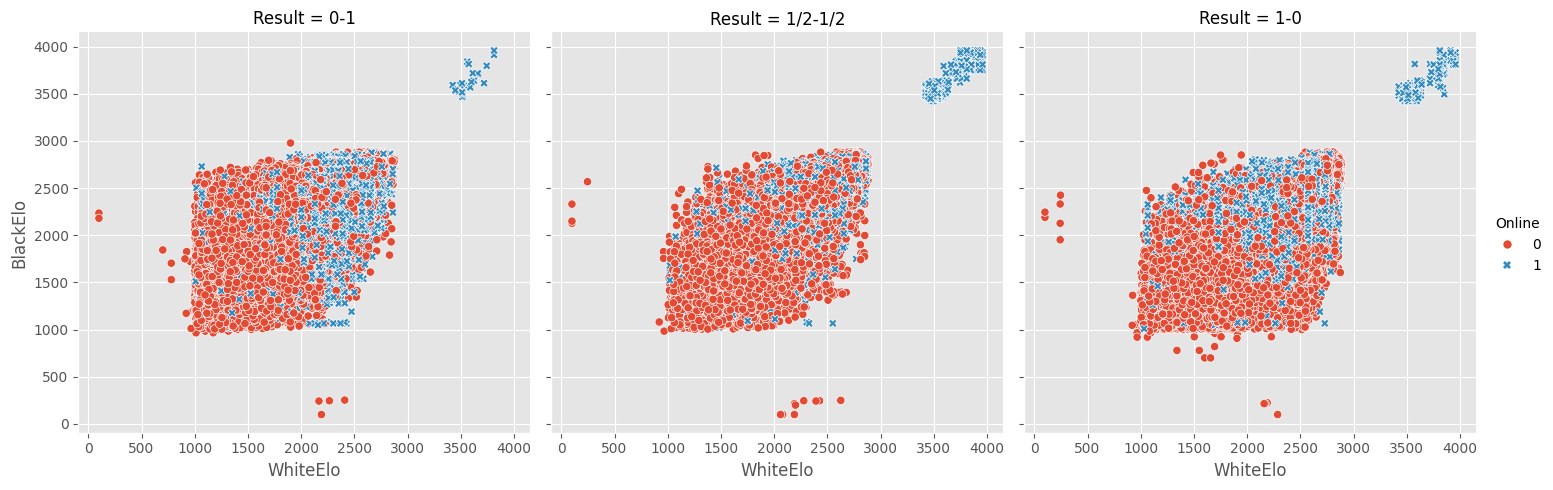

In [28]:
sns.relplot(
    data=df, x='WhiteElo', y='BlackElo',
    col="Result", hue="Online", style="Online",
    kind="scatter"
)
plt.show()

> **Вывод:** Видно что при победе черных, отсутсвует нижний правый угор основного квадрата, который свидетельствует о сильном перевесе в сторону игрока за белых. Аналогично при победе белых. При ничьей же, Ело игроков стремится к справедливой линии, отсекая слишком большой перевес кого-то из игроков.

> Заметно так же, что более высокие рейтинги присутсвуют в онлайне. Скорее всего это указывает о более простом достижении высокого рейтинга онлайн, либо же о искуственном завышении рейтинга самими игроками.

4. *Результат от ранга игроков*

Text(0.5, 1.0, 'Результат партий от ранга игроков')

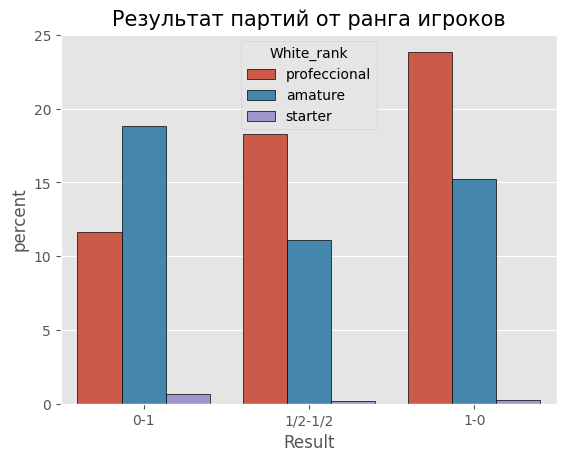

In [29]:
sns.countplot(df, x="Result", hue="White_rank", stat="percent", edgecolor='k')
plt.title("Результат партий от ранга игроков", fontsize=15)

Как мы видим профессиональные игроки наиболее часто реализуют преимущество первого хода за белых, а ситуация у любителей и начинающих совершенно наоборот, и там выигрывают уже за черных чаще. Скорее всего связано это с ответом на действия сопреника, что проще чем навязывать свою игру


5. *Распределение результатов по годам*

In [30]:
df['Year_10s'].value_counts()

Year_10s
2010.0    1019512
2020.0     803001
2000.0     526015
1990.0     394546
1980.0      99970
1970.0      36272
Name: count, dtype: int64

Text(0.5, 1.0, 'Отношение онлайн к оффлайн играм')

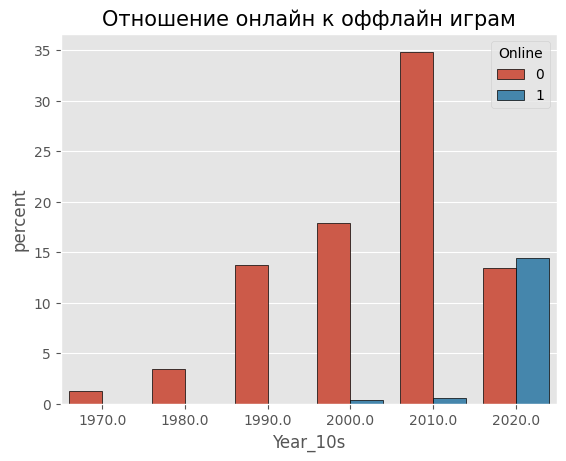

In [31]:
sns.countplot(df, x="Year_10s", hue="Online", stat="percent", edgecolor='k')
plt.title("Отношение онлайн к оффлайн играм", fontsize=15)

> На графике видно, что онлайн турниры появились в 2000х годах, однако уже 2020х сделали рывок и стали более популярны, чем офлайн турниры. Скорее всего связано в отсутствии необходимости перелетов, а так же очной встречи (сидишь дома, играешь в компьютер и чиллишь)

Text(0.5, 1.0, 'Исходов партий по годам')

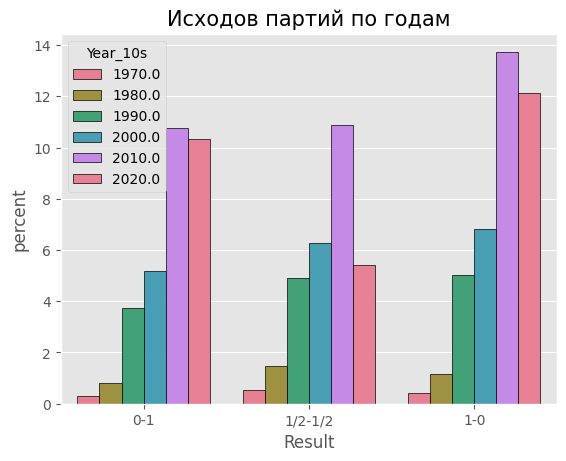

In [32]:
sns.countplot(df, x="Result", hue="Year_10s", stat="percent", palette='husl', edgecolor='k')
plt.title("Исходов партий по годам", fontsize=15)

> По графику и подсчету переменных видно, что больше всего матчей было сыграно в 2010-2020 годах, что логично, так как статистика за 20-30 года еще неполная.

> Так же видно преобладание побед белых, что говорит о существенном преимуществе из-за первого хода. В остальном доля ничей и побед за черных, примерно одинакова, и с годами сильно не менялась (только в 2020-2024 году относительное количество ничьих гораздо меньше)

6. *Результат в зависимости от количества ходов*

Text(0.5, 1.0, 'Зависимость результата от количества ходов')

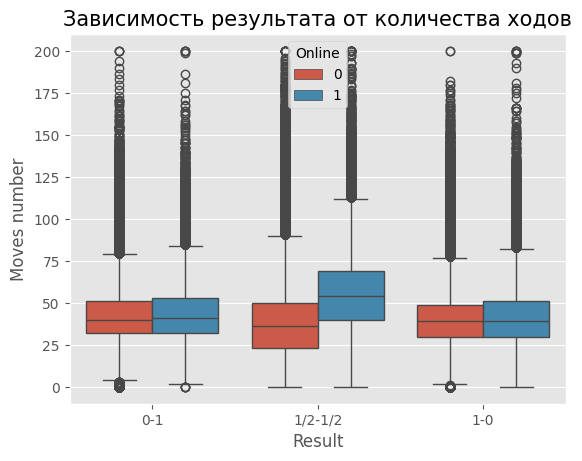

In [33]:
sns.boxplot(data=df, x='Result', y='Moves number', hue="Online")
plt.title("Зависимость результата от количества ходов", fontsize=15)

> Вот здесь видна интересная особенность, что если для всех случев в среднем у нас 40 ходов в партии, однако при игре онлайн, и ходов больше 50, то скорее всего партия закончится ничьей. Для остальных партий тяжело предположить исход от количества ходов. Скорее всего, в онлайне можно быстрее ходить, а так же делать премувы, из-за чего партии заканчиваются повторением ходов, перед окончанием таймера, или же 50 ходов без взятия фигуры (еще одно правило по которому фиксируется ничья в партии). Ходы делаются быстрее => больше ходов в равных позициях => больше ходов при ничье в онлайне.

**Выводы:**
- Наиболее влияющий параметр на исход партии это разница рейтинга между игроками, что в принципе логично

- Небольшое влияние имеет год игры партии, так как распределения результатов партий менялось с годами.

- Игры в онлайне так же имеют свое влияение на исход партии.

- Количество ходов не так сильно влияет на исход матчей, однако в онлайне, большее количество ходов скорее всего приводит к ничье

- Професионалы чаще выигрывают за белых, чем другие группы игроков

- все переменные мало связанны друг с другом, из-за чего мы избегаем большого количества проблем с мультиколлинеарностью перменных


# Гипотезы

**Гипотеза 1**

Гипотеза о равных рейтингах игроков.

*Предпосылки:* Нужно убедиться, что рейтинги будут одинаковыми, иначе будет создаваться искуственный перевес в одну из сторон, и выборка была бы неоднородной.

**H0:** средний рейтинг игроков за белых и за черных равен

**H1:** средние рейтинги игроков за белых и за черных не равны

Наболее подходящим будет тест Уэлча, так как непонятно, будут ли у нас одинаковыми дисперсии (хотя по графикам было похоже на это).

In [34]:
print(ttest_ind(df['WhiteElo'], df['BlackElo'], equal_var=False, alternative='two-sided'))

TtestResult(statistic=16.72079149077587, pvalue=9.279938039826907e-63, df=5758593.220595956)


In [35]:
print(df['WhiteElo'].mean(), df['BlackElo'].mean())

2287.9771344999995 2284.3953588282775


> p-value гораздо меньше уровня значимости, гипотеза о равенстве средних отвергается

**Вывод:** Можно сказать, что данная выборка не однородна, и есть статистически значимый перевес. Скорее всего перевес в сторону белых, если смотреть на средние значения по выборке.


**Гипотеза 2**

Гипотеза о влиянии года на результат игры.

*Предпосылки:* Проверим, есть ли зависимость между годом игры и результатом. Используем тест Хи-квадрат Пирсона.

**H0:** игра с годами не сильно менялась, поэтому распределения побед/поражений одни и те же

**H1:** с годами распределения менялись

In [36]:
year_result = df.pivot_table(index=['Year_10s'], columns=['Result'], aggfunc='count', fill_value=0)['White']
year_result

Result,0-1,1-0,1/2-1/2
Year_10s,,,
1970.0,8494,12084,15694
1980.0,23336,33681,42953
1990.0,108041,144670,141835
2000.0,148684,196596,180735
2010.0,310145,395596,313771
2020.0,297320,349378,156303


In [37]:
dof = sts.chi2_contingency(year_result, correction=False)
print(dof.statistic, dof.pvalue)

67063.04107173656 0.0


> p-value = 0, что говорит, что нулевая гипотеза отвергается при любом уровне значимости

**Вывод:** На основе данного теста, можно сказать, что игра эволюционирует, и зачастую придумываются новые дебюты, либо же, обновляются старые, из-за чего баланс побед/поражений не сохраняется с течением времени.


**Гипотеза 3**

Гипотеза о влиянии игры в онлайне/офлайне на результат.

*Предпосылки:* Проверим, есть ли зависимость между играми онлайна/офлайна и результатом. Используем такой же тест Хи-квадрат Пирсона.

**H0:** игра в онлайне/офлайне на одном и том же уровне, поэтому распределения побед/поражений одни и те же

**H1:** Распределения в онлайне/оффлайне разные

In [38]:
online_result = df.pivot_table(index=['Online'], columns=['Result'], aggfunc='count', fill_value=0)['White']
online_result

Result,0-1,1-0,1/2-1/2
Online,,,
0,713696,924182,798141
1,182324,207823,53150


In [39]:
dof = sts.chi2_contingency(online_result, correction=False)
print(dof.statistic, dof.pvalue)

79246.68633554806 0.0


> p-value = 0, что говорит, что нулевая гипотеза отвергается при любом уровне значимости

**Вывод:** Как и говорилось ранее, существует довольно большие различия между онлайн и офлайн партиями для шахматистов. Поэтому результат естественно будет зависить от типа партии

**Гипотеза 4**

Гипотеза что професионалы на самом деле используют очень сильно преимущество первого хода.

*Предпосылки:* Более слабые игроки имеют тенденцию принимать довольно хаотические решения, которые могут только ухудшать их позицию. Из-за чего наоборот, первый ход для них это проклятье, а не дар (для простоты теста оставили результаты без ничьих). Так же принимаем, что наша выборка очень большая: из-за чего распреление в ней стремится к нормальному.


In [40]:
test = df[(df.Result == '1-0') | (df.Result == '0-1')].Result == '1-0'
np.mean(test)

0.5581809888931349

**H0:** Профессионалы за белых побеждают примерно так же, с медианой 56%

**H1:** Профессионалы побеждают гораздо чаще за белых, чем остальные

Посчитаем z статистику

In [41]:
test = df[(df.Result == '1-0') | (df.Result == '0-1')]
test = test[(test.WhiteElo > 2300) & (test.BlackElo > 2300)].Result == '1-0'
z_obs = (np.mean(test) - 0.56)/sts.sem(test)

print(z_obs, np.mean(test))

33.21101322396291 0.5800878024310129


z-статистика сильно больше 5% квантиля стандартного нормального распределения (1,96), поэтому нулевая гипотеза отвергается и принимается альтернативная.

Теперь попробуем найти тот самый рейтинг, на котором начинает статистически значимо действовать преимущество первого хода.

In [42]:
test = df[(df.Result == '1-0') | (df.Result == '0-1')]
for i in range(1000, 3300, 10):
  z_test = test[(test.WhiteElo > i) & (test.BlackElo > i)].Result == '1-0'
  z_obs = (np.mean(z_test) - 0.56)/sts.sem(z_test)

  if z_obs > 1.96:
    print (f'Рейтинг с которого начинается преимущество первого хода: {i}')
    break

Рейтинг с которого начинается преимущество первого хода: 1820


**Вывод:** По 5% квантилю, мы нашли, что порог, для получения преимущества первого хода, находится в районе 1820 ELO. Именно с этого рейтинга люди примерно начинают быть полу-профессионалами (1800 - примерный порог первого разряда по шахматам).

Ну а уже гроссмейтеры получают преимущество гораздо сильнее. Что в принципе логично и было сказано ранее.

# Машинное обучение

По машинному обучению. Наша задача будет предсказать результат партии (колонка Result/Result_cont). Будем использовать следущие модели: базовая Линейная регрессия, Ridge/Lasso-регрессия, Логистическая регрессия, а так же KNN (так как у нас много категориальных переменных). В качестве метрик для выбора лучшей будем использовать MAE, MSE и R^2-score.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier

In [44]:
df

,Year,Event,Site,White,Black,WhiteElo,BlackElo,Opening,ECO,Moves number,Result,Year_10s,Online,Rating_diff,Big_difference_to,White_rank,Black_rank,Result_cont,Moves_sq
0,1971.0,IBM,Amsterdam,"Scholl, Eduard C","Timman, Jan H",2430,2445,PetroffOther3,C49,43,0-1,1970.0,0,-15,equal,profeccional,profeccional,-1,1849
1,1971.0,URS-ch39,Leningrad,"Geller, Efim P","Smyslov, Vassily",2615,2620,PetroffOther3,C43,11,1/2-1/2,1970.0,0,-5,equal,profeccional,profeccional,0,121
2,1971.0,URS-ch39,Leningrad,"Shamkovich, Leonid","Smyslov, Vassily",2520,2620,PetroffOther3,C65,14,1/2-1/2,1970.0,0,-100,black,profeccional,profeccional,0,196
3,1971.0,CSR-ch,Luhacovice,"Jansa, Vlastimil","Kolarov, Atanas S",2450,2435,PetroffOther3,C43,31,1-0,1970.0,0,15,equal,profeccional,profeccional,1,961
4,1971.0,Malaga,Malaga,"Ciocaltea, Victor","Rogoff, Kenneth",2460,2410,PetroffOther3,C43,43,1-0,1970.0,0,50,equal,profeccional,profeccional,1,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900167,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Amangeldy,Ernur",1671,2134,Sicilian2d6-4Qxd4,B53,99,0-1,2020.0,0,-463,black,amature,amature,-1,9801
2900168,2023.0,World Blitz 2023,Samarkand UZB,"Hovhannisyan,R","Gokerkan,Cem Kaan",2611,2523,Sicilian2d6-4Qxd4,B53,32,1-0,2020.0,0,88,equal,profeccional,profeccional,1,1024
2900169,2023.0,World Blitz 2023,Samarkand UZB,"Bogdan,David","Kuandykuly,Danis",1671,2095,Sicilian2d6-4Qxd4,B53,47,0-1,2020.0,0,-424,black,amature,amature,-1,2209
2900170,2023.0,World Blitz 2023,Samarkand UZB,"Shimanov,A","Bocharov,D",2578,2518,Sicilian2d6-4Qxd4,B53,33,1-0,2020.0,0,60,equal,profeccional,profeccional,1,1089


Удаляем все явно ненужные столбцы, которые явно не сильно будут влиять на результат, а так же могут дать слишком много дамми переменных

In [45]:
learning_data = df.drop(columns=['Event', 'Site', 'White', 'Black', 'ECO', 'Year', 'Result', 'Opening'])
learning_data

,WhiteElo,BlackElo,Moves number,Year_10s,Online,Rating_diff,Big_difference_to,White_rank,Black_rank,Result_cont,Moves_sq
0,2430,2445,43,1970.0,0,-15,equal,profeccional,profeccional,-1,1849
1,2615,2620,11,1970.0,0,-5,equal,profeccional,profeccional,0,121
2,2520,2620,14,1970.0,0,-100,black,profeccional,profeccional,0,196
3,2450,2435,31,1970.0,0,15,equal,profeccional,profeccional,1,961
4,2460,2410,43,1970.0,0,50,equal,profeccional,profeccional,1,1849
...,...,...,...,...,...,...,...,...,...,...,...
2900167,1671,2134,99,2020.0,0,-463,black,amature,amature,-1,9801
2900168,2611,2523,32,2020.0,0,88,equal,profeccional,profeccional,1,1024
2900169,1671,2095,47,2020.0,0,-424,black,amature,amature,-1,2209
2900170,2578,2518,33,2020.0,0,60,equal,profeccional,profeccional,1,1089


In [46]:
continious_features = ['WhiteElo', 'BlackElo', 'Moves number', \
                       'Online', 'Rating_diff', 'Moves_sq']
categorical_features = [
    # 'Opening',
    'Big_difference_to', 'White_rank', \
                        'Black_rank', 'Year_10s']

target_cont = 'Result_cont'

In [47]:
for i in continious_features:
  learning_data[i] = learning_data[i].astype('int')

1. **Линейная регрессия базовая**

Начнем с линейной регрессии, где возьмем только contunious_features. Линейная регрессия не идеальный вариант, так как она возвращает значения за пределами определния, однако ее будет просто интерпритировать

Разбиваем на тест и трейн семплы для модели.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(learning_data[continious_features], learning_data[target_cont], test_size=0.2, random_state=42)

Создаем, обучаем и проверяем статистику модели

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)
y_train_hat = model.predict(X_train)

print("Test MAE = %.2f" % metrics.mean_absolute_error(y_test, y_test_hat))
print("Train MAE = %.2f" % metrics.mean_absolute_error(y_train, y_train_hat))
print("Train MSE = %.2f" % metrics.mean_squared_error(y_train, y_train_hat))
print("Test MSE = %.2f" % metrics.mean_squared_error(y_test, y_test_hat))
print(f"Train R2: { metrics.r2_score(y_train, y_train_hat)}")
print(f"Test R2: { metrics.r2_score(y_test, y_test_hat)}")

Test MAE = 0.62
Train MAE = 0.62
Train MSE = 0.55
Test MSE = 0.55
Train R2: 0.2130056284876437
Test R2: 0.21230276989748376


Полученные результаты так себе, так как модель описывает верно около 21% наших данных, что как-то не сильно звучит. В среднем мы ошибаемся на 0.62, что достаточно существенно, если учитывать область значений: [-1; 1]

> Рассмотрим коэфиценты модели:

In [50]:
coefficients = model.coef_
intercept = model.intercept_

print("Пересечение модели:", intercept)
for i, j in zip(continious_features, coefficients):
  print(i, "{:e}".format(j))

Пересечение модели: 0.006378173442755153
WhiteElo 6.088092e-04
BlackElo -5.436428e-04
Moves number -2.140216e-03
Online -2.266550e-02
Rating_diff 1.152452e-03
Moves_sq 6.112823e-06


Из коэфицентов видно, что наибольшее влияние имеет переменная онлайна, которая уменьшает шансы на победу белых, на 0,02 пункта (если говорить в пределах между [-1, 1]). Так же с каждым ходом уменьшается шанс на победу белых и этот максимум достигает на 177 ходу (что довольно недостижимо). Посчиталось просто, как центр параболы.

**Вывод:** Самая базовая линейная модель не настолько репрезентативная и точная. Попробуем добавить категориальные переменные, а так же проскалировать числовые.

2. **Линейная регрессия**

Добавляем категориальные переменные и скалируем числовые

In [51]:
ohe = pd.get_dummies(learning_data, columns=categorical_features, drop_first=True)
ohe

,WhiteElo,BlackElo,Moves number,Online,Rating_diff,Result_cont,Moves_sq,Big_difference_to_equal,Big_difference_to_white,White_rank_profeccional,White_rank_starter,Black_rank_profeccional,Black_rank_starter,Year_10s_1980.0,Year_10s_1990.0,Year_10s_2000.0,Year_10s_2010.0,Year_10s_2020.0
0,2430,2445,43,0,-15,-1,1849,True,False,True,False,True,False,False,False,False,False,False
1,2615,2620,11,0,-5,0,121,True,False,True,False,True,False,False,False,False,False,False
2,2520,2620,14,0,-100,0,196,False,False,True,False,True,False,False,False,False,False,False
3,2450,2435,31,0,15,1,961,True,False,True,False,True,False,False,False,False,False,False
4,2460,2410,43,0,50,1,1849,True,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900167,1671,2134,99,0,-463,-1,9801,False,False,False,False,False,False,False,False,False,False,True
2900168,2611,2523,32,0,88,1,1024,True,False,True,False,True,False,False,False,False,False,True
2900169,1671,2095,47,0,-424,-1,2209,False,False,False,False,False,False,False,False,False,False,True
2900170,2578,2518,33,0,60,1,1089,True,False,True,False,True,False,False,False,False,False,True


In [52]:
ohe_features = ohe.shape[1] - len(learning_data.columns)
ohe_features

7

Всего мы добавили 230 различных дамми переменных (если еще не считать по 1 дефолтной в каждой группе, если не брать никакие другие).

UPD: К сожалению, такое количество переменных не дает обучать модель достаточно эффективно (вся бесплатная память гугл коллаба заканчивается). Поэтому пришлось выкинуть Openning из наших фичей. (Если у вас есть довольно мощные компьютеры, то расскоменте эту переменную в категоричных, и запустите. Может что-то интересное и получится).

In [53]:
X_train, X_test, y_train, y_test = train_test_split(ohe.drop(columns=[target_cont]), ohe[target_cont], test_size=0.20, random_state=42)

In [54]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), continious_features),
    ])

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)
y_train_hat = model.predict(X_train)

print("Test MAE = %.2f" % metrics.mean_absolute_error(y_test, y_test_hat))
print("Train MAE = %.2f" % metrics.mean_absolute_error(y_train, y_train_hat))
print("Train MSE = %.2f" % metrics.mean_squared_error(y_train, y_train_hat))
print("Test MSE = %.2f" % metrics.mean_squared_error(y_test, y_test_hat))
print(f"Train R2: { metrics.r2_score(y_train, y_train_hat)}")
print(f"Test R2: { metrics.r2_score(y_test, y_test_hat)}")

Test MAE = 0.62
Train MAE = 0.62
Train MSE = 0.54
Test MSE = 0.54
Train R2: 0.221447583371417
Test R2: 0.22109028075492854


Как видно у нас совсем ненамного выросло R^2 статитстика, что говорит, о не в полне правильном выборе линейной регрессии для этой задачи.

In [56]:
coefficients = model.coef_
intercept = model.intercept_

print("Пересечение модели:", intercept)
for i, j in zip(list(ohe.drop(columns=[target_cont])), coefficients):
  print(i, "{:e}".format(j))

Пересечение модели: -0.14429957081772443
WhiteElo 4.340609e-04
BlackElo -3.713762e-04
Moves number -2.219875e-03
Online -1.877821e-02
Rating_diff 8.054371e-04
Moves_sq 6.891320e-06
Big_difference_to_equal 1.620968e-01
Big_difference_to_white 3.117991e-01
White_rank_profeccional 4.311612e-02
White_rank_starter 1.858959e-01
Black_rank_profeccional -4.348385e-02
Black_rank_starter -1.699961e-01
Year_10s_1980.0 4.926531e-03
Year_10s_1990.0 -1.167047e-04
Year_10s_2000.0 -7.784949e-04
Year_10s_2010.0 4.092936e-04
Year_10s_2020.0 -4.441884e-03


Наблюдается, что наибольшее влияние имеют ранги игроков (профессионалы/начинающие/любители), а также куда идет большой перевес, если он есть в партии. В этом прослеживается вполне себе логичный смысл, что это и будет иметь решающее значение на исход партии. Эло самих же игрков почти что зануляется друг об друга (коэфиценты очень близкие) + еще берется разница отдельным коэфицентом, поэтому и приводит к нулю все это дело.

3. **Rigde/Lasso регресии**

Так как результаты у нас получились не очень, то попробуем применить данные регрессии, и посмотреть, какие переменные можно попробовать занулить. Сразу будем пробовать подобрать альфу по сетке, так же смотря на изменение переменных.

In [57]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

X = ohe.drop(columns=[target_cont])
y = ohe[target_cont]
# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

Text(0.5, 1.0, 'Ridge')

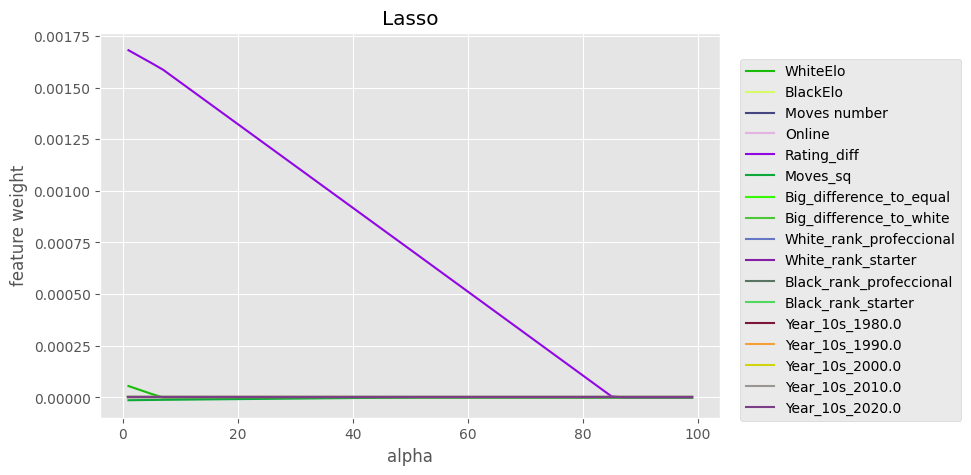

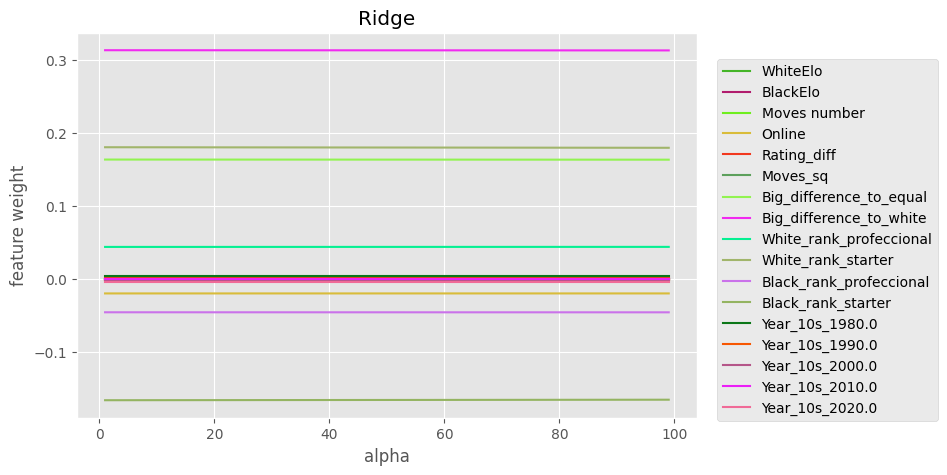

In [58]:
plt.figure(figsize=(8, 5))
features = list(ohe.drop(columns=[target_cont]))
for coef, feature in zip(coefs_lasso.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Как видно из графиков, по Лассо долгое время не зануляется только пременная отвечающая за разность рейтинга, остальные же, где-то очень близко к нулю. По Риджу, вообще происходит странная ситуация, что в принципе все веса переменных при любом значении alpha остаются одинаковыми.

> Все это в принципе говорит, о том, насколько тяжело описать и предсказать исход шахматной партии с данными переменными.

4. **KNN**

Попробуем находить результат по ближайшим соседям. Так как выглядит это логичнее всего. Однако kNN не самая идеальная модель для этого (будет описано дальше).

По гиперпараметрам в КНН ставим 20 ближайших соседей, остальные оставляем дефолтные, по типу, расстояние будет вычисляться как одинаковое до всех соседей (так как некоторые категории невозможно отсортировать по возрастанию, что является одной из проблем).

In [59]:
X_train, X_test, y_train, y_test = train_test_split(learning_data[continious_features], learning_data[target_cont], test_size=0.2, random_state=42)

In [60]:
model = KNeighborsClassifier(20)
model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)
y_train_hat = model.predict(X_train)

print("Test MAE = %.2f" % metrics.mean_absolute_error(y_test, y_test_hat))
print("Train MAE = %.2f" % metrics.mean_absolute_error(y_train, y_train_hat))
print("Train MSE = %.2f" % metrics.mean_squared_error(y_train, y_train_hat))
print("Test MSE = %.2f" % metrics.mean_squared_error(y_test, y_test_hat))
print(f"Train R2: { metrics.r2_score(y_train, y_train_hat)}")
print(f"Test R2: { metrics.r2_score(y_test, y_test_hat)}")

Test MAE = 0.59
Train MAE = 0.53
Train MSE = 0.81
Test MSE = 0.89
Train R2: -0.16183503799145593
Test R2: -0.27799360408455365


Мы наблюдаем ужасающую вещь, а именно отрицательный R2 score. На самом деле это возможно, даже математически. Так как в KNN нет константы и поэтому KNN не мэтчится с трендом. Но как мы видим, мы смогли добиться некоторых улучшений в метрике MAE, что готоворит, о том, что KNN в принципе может быть подходящей моделью.

**Вывод:** Хоть у нас и не получилось построить полноценную модель, которая неплохо бы предиктила наши данные, однако, мы попробовали несколько различных моделей.

Можно сказать, что предсказание на этих данных исхода шахматной партии, очень сложно, так как даже при всех равных, исход партии может быть совсем иным. Именно поэтому до сих пор используют либо очень простые анализаторы позиции в партии, либо бы сверхкомпьютеры, которые перебирают все доступные варианта продолжения позиции.

В нашем случае, обьяснение 22% наших данных, мы считаем весьма себе неплохим результатом, с учетом сложностей в парсинге, а так же специфичности темы.